# Assignment on Simple Linear Regression: Datase

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read datasets
data = pd.read_csv(r"D:\Assignments\Simple linear regression\delivery_time.csv",header=0)
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA and Data Visualizations

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.describe(include='all')

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data.isnull().sum() # no na/nan values

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
# for finding unique value
for i in data:
    print(data[i].unique())

[21.   13.5  19.75 24.   29.   15.35 19.    9.5  17.9  18.75 19.83 10.75
 16.68 11.5  12.03 14.88 13.75 18.11  8.   17.83 21.5 ]
[10  4  6  9  7  3  8  2  5]


In [7]:
#Corelation Matrix
data.corr() # high correlation with dependent variable

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [8]:
# Rename the column names
data.rename(columns ={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},inplace=True) 

In [9]:
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [10]:
# Cheking for kurtosis
from scipy.stats import kurtosis

print(kurtosis(data.Delivery_Time))
print(kurtosis(data.Sorting_Time))

-0.02558576894549036
-1.1653901357029155


In [11]:
# cheking for skweness
from scipy.stats import skew

print(skew(data.Delivery_Time))
print(skew(data.Sorting_Time))

0.326702631656106
0.043680994983108075


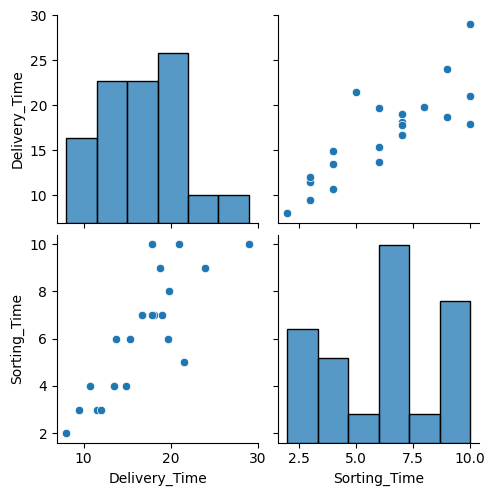

In [12]:
# Create the default pairplot
sns.pairplot(data)    #positve correlation

<AxesSubplot: >

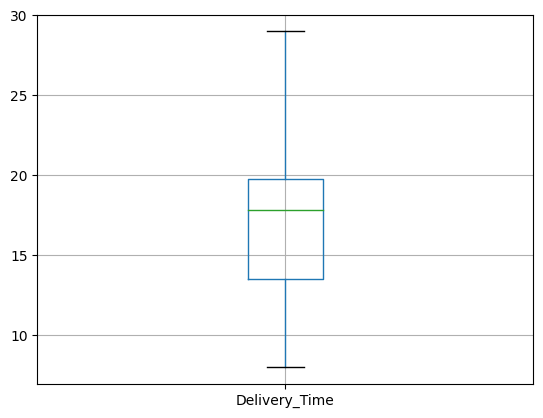

In [13]:
#Box plot
data.boxplot(column=['Delivery_Time'])
# no outliers present in data

C:\Users\Dell\AppData\Local\Temp\ipykernel_21492\4196473581.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery_Time'])


<AxesSubplot: xlabel='Delivery_Time', ylabel='Density'>

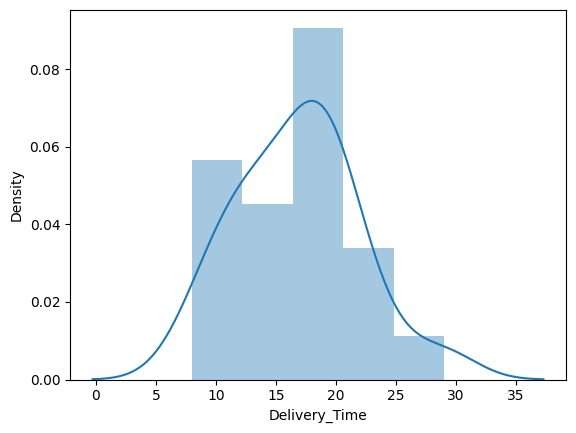

In [14]:
sns.distplot(data['Delivery_Time'])

<AxesSubplot: >

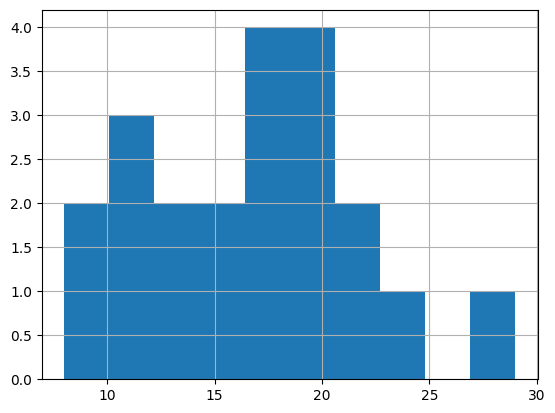

In [15]:
# Histogram
data['Delivery_Time'].hist()

<AxesSubplot: >

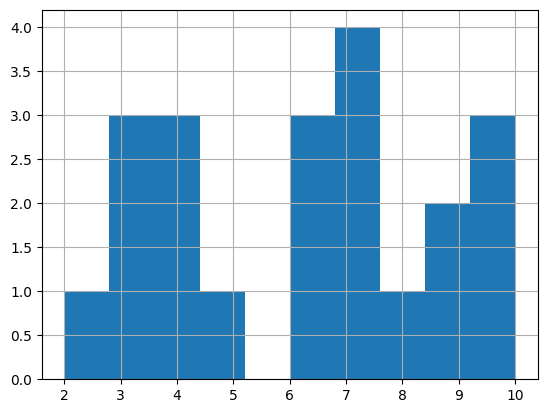

In [16]:
data['Sorting_Time'].hist()

<AxesSubplot: >

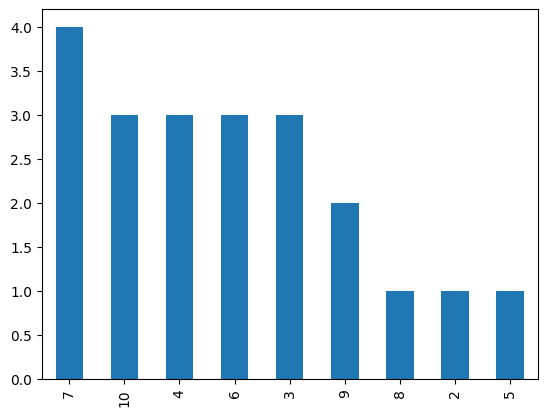

In [17]:
#Bar plot
data['Sorting_Time'].value_counts().plot.bar()

# Model Building

In [18]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time",data = data).fit()

In [19]:
#!pip install statsmodels --upgrade

In [20]:
print(model.params)
print(model.summary())

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        15:55:25   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [21]:
# Coefficients Bo and B1
Bo, B1 = model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (model.tvalues, model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (model.rsquared, model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  6.5827339719970555
Sorting Time, B1:  1.649019896831246
tvalue:  Intercept       3.823349
Sorting_Time    6.387447
dtype: float64
pvalue:  Intercept       0.001147
Sorting_Time    0.000004
dtype: float64
R2:  0.6822714748417231
R2_Adj:  0.6655489208860244


<AxesSubplot: xlabel='Sorting_Time', ylabel='Delivery_Time'>

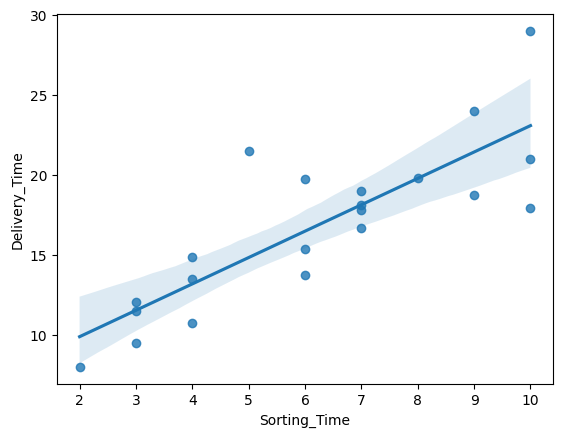

In [22]:
sns.regplot(x=data['Sorting_Time'],y=data['Delivery_Time'])

In [23]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [24]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model Prediction : using equation :- Y = 6.582734 + 1.649020*X

In [25]:
# Manual prediction for say sorting time 15
Delivery_Time = (6.582734) + (1.649020)*(15)
Delivery_Time


31.318033999999997

In [26]:
# Manual prediction for say sorting time 8
Delivery_Time = (6.582734) + (1.649020)*(8)
Delivery_Time

19.774894

In [27]:
Predicted_Time = model.predict(data.Sorting_Time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data.Delivery_Time, 'Delivery_Time_Predicted' : Predicted_Time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,21.00,23.072933
1,13.50,13.178814
2,19.75,16.476853
3,24.00,21.423913
4,29.00,23.072933
5,15.35,16.476853
6,19.00,18.125873
7,9.50,11.529794
8,17.90,23.072933
9,18.75,21.423913


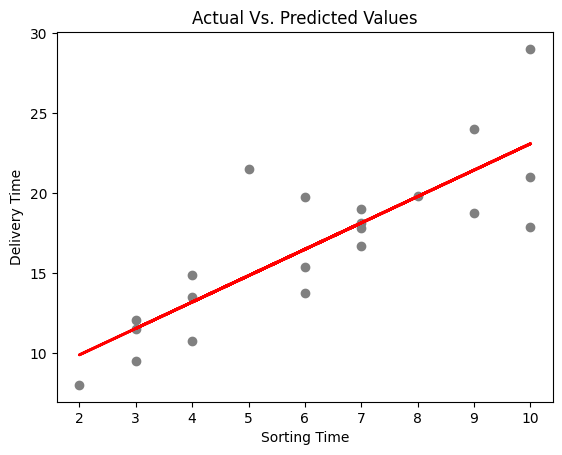

In [28]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data.Sorting_Time, data.Delivery_Time,  color='gray')
plt.plot(data.Sorting_Time, Predicted_Time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

# Checking Normality of Residuals Using the Anderson-Darling test for normal distribution

p-value from the test: below 0.05 generally means non-normal: 0.1496009945346252
Residuals are normally distributed


C:\Users\Dell\AppData\Local\Temp\ipykernel_21492\393932710.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


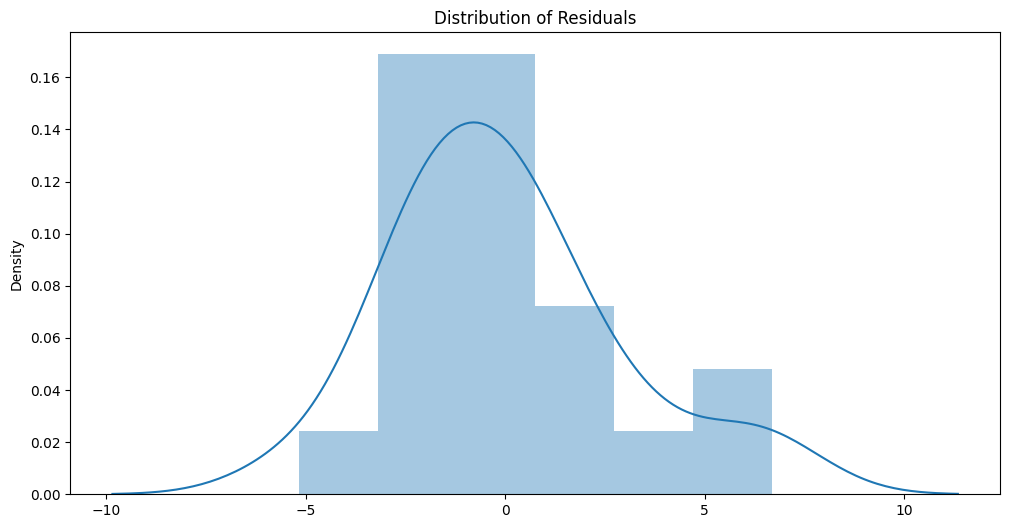

In [30]:
from statsmodels.stats.diagnostic import normal_ad
residuals = data.Delivery_Time - Predicted_Time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

# Building model with Logarithmic Transformation: Y = a + b * log(x)

In [31]:
# Preparing data for model building
data1 = pd.DataFrame.copy(data)
data1['log_Sorting_Time'] = np.log(data1.Sorting_Time)
data1.head()

,Delivery_Time,Sorting_Time,log_Sorting_Time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


In [32]:
# Building model
log_model = smf.ols('Delivery_Time ~ log_Sorting_Time', data = data1).fit()

In [33]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           2.64e-06
Time:                        15:55:26   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_Sorting_Time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Building model with exponential transformation :log(Y) =α + βX + ε

In [36]:
# preparing data to build exponential model
data1['log_Delivery_Time'] = np.log(data1.Delivery_Time)
data1.head()

,Delivery_Time,Sorting_Time,log_Sorting_Time,log_Delivery_Time
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296


In [37]:
# Building model
exp_model = smf.ols('log_Delivery_Time ~ Sorting_Time', data = data1).fit()

In [38]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_Delivery_Time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           1.59e-06
Time:                        15:55:26   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Building model with square root transformation: √Y = a + b * X + e

In [41]:
# preparing data to build model
data1['sqrt_Delivery_Time'] = np.sqrt(data1.Delivery_Time)
data1.head()

,Delivery_Time,Sorting_Time,log_Sorting_Time,log_Delivery_Time,sqrt_Delivery_Time
0,21.00,10,2.302585,3.044522,4.582576
1,13.50,4,1.386294,2.602690,3.674235
2,19.75,6,1.791759,2.983153,4.444097
3,24.00,9,2.197225,3.178054,4.898979
4,29.00,10,2.302585,3.367296,5.385165


In [42]:
# Building model
sqrt_model = smf.ols('sqrt_Delivery_Time ~ Sorting_Time', data = data1).fit()

In [43]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sqrt_Delivery_Time   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           2.00e-06
Time:                        15:55:26   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
Sorting_Time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion: